<a href="https://colab.research.google.com/github/niharika9206/WQI-prediction/blob/main/rightusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv("USA_dataset.csv")  # Replace with actual name


In [ ]:
area_counts = df['Area'].value_counts()
print("Top 10 Most Frequent Areas:")
print(area_counts.head(10))


Top 10 Most Frequent Areas:
Area
Lake Washington          54281
Lake Sammamish           26818
Central Puget Sound      22499
Los Angeles              21478
San Joaquin              17868
Lake Union/Ship Canal    13666
Contra Costa             11699
San Bernardino            9935
Sacramento                9404
Kern                      9345
Name: count, dtype: int64


In [ ]:
study_area = "Lake Washington"  # ← Replace with your chosen code
df_area = df[df['Area'].str.contains(study_area)]
df_area.head()


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
241434,USA,Lake Washington,Lake,02-01-1990,0.021,1.6,9.87,0.012,7.8,11.10,0.400,0.244,100.0,Excellent
241435,USA,Lake Washington,Lake,02-01-1996,0.021,1.6,9.87,0.040,7.8,11.10,0.383,0.900,100.0,Excellent
241437,USA,Lake Washington,Lake,02-01-1996,0.029,1.6,9.87,0.040,7.8,11.10,0.400,0.900,100.0,Excellent
241438,USA,Lake Washington,Lake,02-01-1996,0.021,1.6,9.87,0.011,7.8,8.65,0.400,0.900,100.0,Excellent
241439,USA,Lake Washington,Lake,02-01-1996,0.021,1.6,9.87,0.040,6.9,8.18,0.415,0.900,100.0,Excellent


In [ ]:
df_area['Year'] = df_area['Date'].astype(str).str[-4:]
df_area['Year'].value_counts().sort_index()


/tmp/ipython-input-15-795508017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Year'] = df_area['Date'].astype(str).str[-4:]


,count
Year,
1981,120
1982,145
1983,161
1984,123
1985,113
1986,117
1987,118
1988,93
1989,70


In [ ]:
df_area['Waterbody Type'].value_counts()


,count
Waterbody Type,
Lake,54281


In [ ]:
df_area['CCME_WQI'].value_counts()


,count
CCME_WQI,
Excellent,53141
Good,1117
Fair,20
Poor,2
Marginal,1


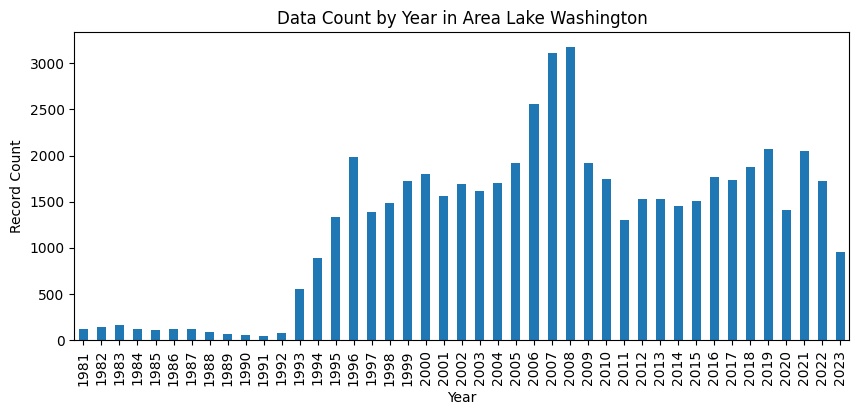

In [ ]:
import matplotlib.pyplot as plt

df_area['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4))
plt.title(f'Data Count by Year in Area {study_area}')
plt.xlabel("Year")
plt.ylabel("Record Count")
plt.show()


In [ ]:
top_50_areas = df['Area'].value_counts().head(50).index.tolist()
print("Top 50 Areas:", top_50_areas)

In [ ]:
df_top50 = df[df['Area'].isin(top_50_areas)]

In [ ]:
numeric_cols = df_top50.select_dtypes(include='number').columns


In [ ]:
summary_stats = df_top50.groupby('Area')[numeric_cols].agg(['mean', 'median', 'std'])

In [ ]:
summary_stats

Ammonia (mg/l)                   \
                              mean median       std   
Area                                                  
Central Puget Sound       0.023886  0.021  0.031190   
Lake Sammamish            0.021932  0.021  0.035842   
Lake Washington           0.021385  0.021  0.037217   
Los Angeles               0.307821  0.021  3.503546   
San Joaquin               0.038854  0.021  0.291604   

                    Biochemical Oxygen Demand (mg/l)                   \
                                                mean median       std   
Area                                                                    
Central Puget Sound                         1.600000    1.6  0.000000   
Lake Sammamish                              1.600000    1.6  0.000000   
Lake Washington                             1.600000    1.6  0.000000   
Los Angeles                                 3.245214    1.6  8.674159   
San Joaquin                                 1.704936    1.6  1.014369   

                    Dissolved Oxygen (mg/l)                   \
                                       mean median       std   
Area                                                           
Central Puget Sound                9.400931   9.87  1.622446   
Lake Sammamish                     9.727123   9.87  1.692370   
Lake Washington                    9.856965   9.87  1.062395   
Los Angeles                        9.995955   9.87  1.586140   
San Joaquin                       10.149180   9.87  1.628974   

                    Orthophosphate (mg/l)  ... Temperature (cel)  \
                                     mean  ...               std   
Area                                       ...                     
Central Puget Sound              0.049638  ...          1.693306   
Lake Sammamish                   0.036065  ...          3.227532   
Lake Washington                  0.036907  ...          2.989729   
Los Angeles                      0.043971  ...          4.401967   
San Joaquin                      0.062634  ...          3.572264   

                    Nitrogen (mg/l)                  Nitrate (mg/l)         \
                               mean median       std           mean median   
Area                                                                         
Central Puget Sound        0.399084    0.4  0.054670       0.564042  0.425   
Lake Sammamish             0.404630    0.4  0.069925       0.793430  0.900   
Lake Washington            0.387522    0.4  0.051155       0.784665  0.900   
Los Angeles                0.514242    0.4  1.118810       6.399402  0.900   
San Joaquin                0.473622    0.4  0.578920       2.060622  0.900   

                               CCME_Values                   
                           std        mean median       std  
Area                                                         
Central Puget Sound   0.305804   97.289250  100.0  3.446039  
Lake Sammamish        0.246401   99.525486  100.0  1.805583  
Lake Washington       0.266763   99.843621  100.0  1.193031  
Los Angeles          13.371310   97.521693  100.0  6.536802  
San Joaquin           5.438005   97.564579  100.0  4.834912  

[5 rows x 27 columns]

In [ ]:
study_area = "Kern"  # ← Replace with your chosen code
df_area = df[df['Area'].str.contains(study_area)]
df_area.head()


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
37418,USA,Kern,River,02-01-2016,0.021,1.6,9.87,0.04,7.8,17.3,0.4,0.9,100.0,Excellent
37419,USA,Kern,River,02-01-1942,0.021,1.6,9.87,0.04,7.7,11.3,0.4,0.9,100.0,Excellent
37421,USA,Kern,River,02-01-1957,0.021,1.6,9.53,0.04,8.1,13.8,0.4,0.9,100.0,Excellent
37422,USA,Kern,River,02-01-1958,0.021,1.6,8.80,0.04,8.3,13.1,0.4,3.4,100.0,Excellent
37427,USA,Kern,River,02-01-1962,0.021,1.6,8.08,0.04,7.8,13.3,0.4,0.9,100.0,Excellent
